In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt 
from fast_glcm import fast_glcm, fast_glcm_mean, fast_glcm_std, fast_glcm_contrast, fast_glcm_dissimilarity, fast_glcm_entropy, fast_glcm_homogeneity
from image_extractor import init_lut,apply_lut, hsv_filter, histogram_analysis, statistic_extractor, geometry_extractor, linear_fn, curved, CLAHE, contour_extractor, seperate_plotting

image2_dir  = 'D:/Thesis_data/Backups/Color_Corrected_512x512/Agglutinated/image (99).JPG'
image_dir = 'D:/Thesis_data/Backups/Color_Corrected_512x512/Plated_Purple/image (3).JPG'

plt.rcParams['figure.dpi'] = 102.46 


In [2]:
image  = cv2.imread(image_dir)
image2 = cv2.imread(image2_dir)
im_shape = np.shape(image)
# print(im_shape)

lut1 = init_lut(fn=linear_fn, coefficient=10)
lut2 = init_lut(fn=curved, coefficient=1.5)
# lut3 = init_lut(fn=bezier)
# plt.rcParams["figure.figsize"] = (5,5)
# plt.plot(np.linspace(0,255,256), lut);
# plt.plot(np.linspace(0,255,256), lut2);
# plt.show()

In [3]:

image_hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
image_hsv = apply_lut(image_hsv, 2, lut2)
image_hsv = apply_lut(image_hsv, 1, lut1)

image_hsv = hsv_filter(image_hsv)
image_rgb = cv2.cvtColor(image_hsv, cv2.COLOR_HSV2RGB)
(y1,y2,x1,x2), real_area, perimeter, (alX, alY), orientation, ellipse_eccentricity, convex_area, eq_radius, solidity, bb_ratio, eccentricity_distance = geometry_extractor(image_rgb)
croped_img = cv2.cvtColor(image_hsv[y1:y2,x1:x2],cv2.COLOR_HSV2RGB)
croped_img = image_hsv[y1:y2,x1:x2]

# croped_img = image_hsv
# image_rgb_bb = draw_bb(image_rgb, (x,y,w,h))

# image_hsv2 = cv2.cvtColor(image2, cv2.COLOR_BGR2HSV)
# image_hsv2 = apply_lut(image_hsv2, 2, lut2)
# image_hsv2 = hsv_filter(image_hsv2)
# image_rgb2 = cv2.cvtColor(image_hsv2,cv2.COLOR_HSV2RGB)
# (x,y,w,h) = find_bb(image_hsv2)
# croped_img2 = image_rgb2[y:y+h,x:x+w]
# image_rgb_bb2 = draw_bb(image_rgb2, (x,y,w,h))


144.18376553058624
132.28427076339722
2200.1950803995132
116.76955199241638
362.61017167568207
147.8406195640564


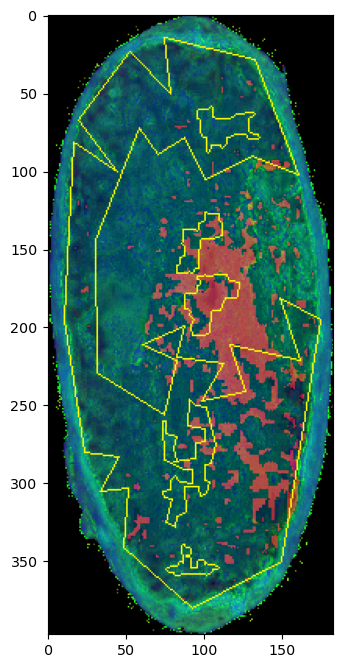

In [4]:
img = cv2.cvtColor(croped_img, cv2.COLOR_BGR2GRAY)
img2 = CLAHE(img, grey=True)

ret, thresh1 = cv2.threshold(img2,200,255,cv2.THRESH_TOZERO)
ret, thresh2 = cv2.threshold(img2,30,255,cv2.THRESH_TOZERO_INV)

blur1 = cv2.blur(thresh1, (10,10))
blur2 = cv2.blur(thresh2, (10,10))

# ct1 = contour_extractor(blur1)
ct2 = contour_extractor(blur2)
# print(ct2)

# cv2.drawContours(croped_img, ct1, -1, (0,255,255), 1)
# cv2.drawContours(croped_img, ct2, -1, (0,255,255), 1)
for cnt in ct2:
    perimeter = cv2.arcLength(cnt,True)
    if perimeter>100:
        print(perimeter)
        approximatedShape = cv2.approxPolyDP(cnt, 0.005 * perimeter, True)
        cv2.drawContours(croped_img, [approximatedShape], -1, (255, 255, 0), 1)

plt.rcParams["figure.figsize"] = (4,8)
# plt.subplot(4,2,1)
# plt.imshow(img)
# plt.subplot(4,2,2)
# plt.imshow(img2)
# plt.subplot(4,2,3)
# plt.imshow(thresh1)
# plt.subplot(4,2,4)
# plt.imshow(thresh2)
# plt.subplot(4,2,5)
# plt.imshow(blur1)
# plt.subplot(4,2,6)
# plt.imshow(blur2)
# plt.subplot(4,2,7)
# plt.imshow(ctim1)
# plt.subplot(4,2,8)
plt.imshow(croped_img)
plt.show()

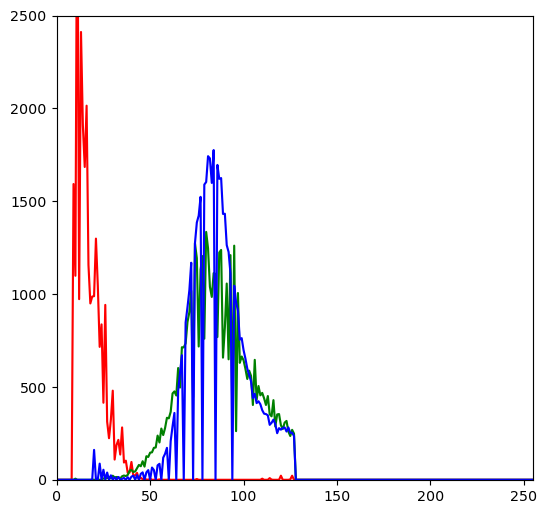

In [6]:
plt.rcParams["figure.figsize"] = (10,5)
# plt.subplot(1,2,1)
histogram = histogram_analysis(croped_img, plot=True)
# plt.subplot(1,2,2)
# histogram2 = histogram_analysis(croped_img2, plot=True)

In [7]:
a=statistic_extractor(croped_img)
# b=statistic_extractor(croped_img2)
print(a)
# print(b)

[[31.34813010144389 80.51670314242061 70.47776355452781]
 [8.0 82.0 82.0]
 [62.707646858540656 56.669442734586596 44.112238751940374]
 [2.437392153877072 0.7267541463834907 -0.5041166956763453]
 [4.578510976881715 1.5163657215258688 -0.72558184055559]]


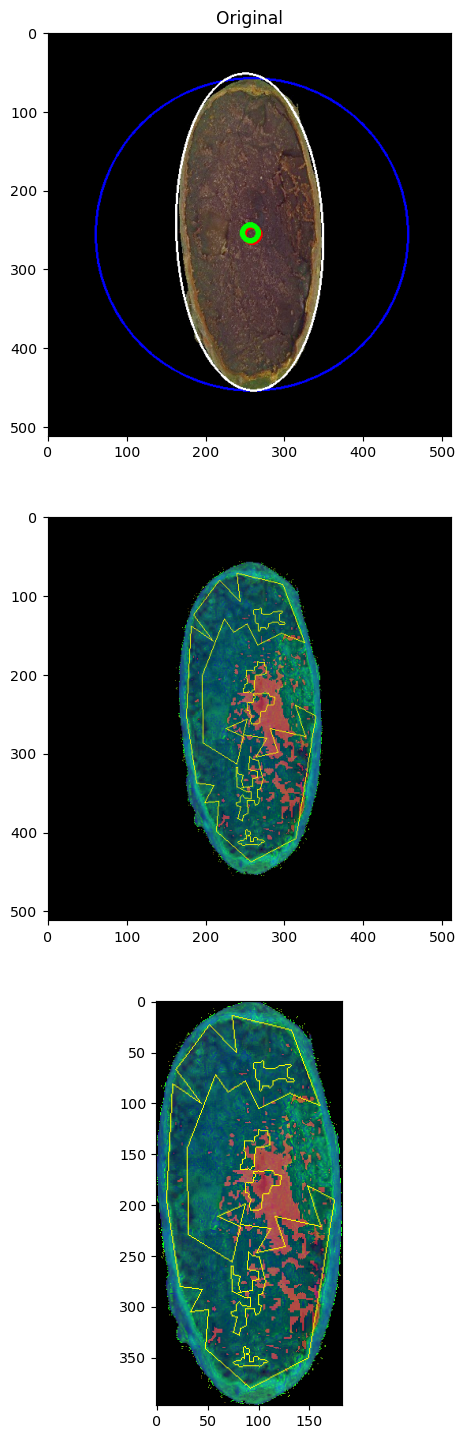

In [8]:
plt.rcParams["figure.figsize"] = (12,24)
plt.subplot(4,2,1)
plt.title("Original")
plt.imshow(image_rgb)
plt.subplot(4,2,3)
plt.imshow(image_hsv)
# plt.subplot(4,2,5)
# plt.imshow(image_rgb_bb)
plt.subplot(4,2,5)
plt.imshow(croped_img)

# plt.subplot(4,2,2)
# plt.title("Adjusted")
# plt.imshow(image_rgb2)
# plt.subplot(4,2,4)
# plt.imshow(image_hsv2)
# plt.subplot(4,2,6)
# plt.imshow(image_rgb_bb2)
# plt.subplot(4,2,8)
# plt.imshow(croped_img2)

plt.show()